<a href="https://colab.research.google.com/github/i-johnvictor/ml_with_tensorflow/blob/main/06_tf_cnn_complex_image_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import random
from shutil import copyfile
import tensorflow as tf
import numpy as np

In [ ]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset
# Note: This is a very large dataset and will take time to download
!wget --no-check-certificate "https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip" -O "/tmp/cats-and-dogs.zip"
local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))
# Expected Output:
# 12501
# 12501

--2025-05-23 08:05:45--  https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.252.210, 2600:1413:5000:12a1::317f, 2600:1413:5000:12ae::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.252.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   118MB/s    in 7.0s    

2025-05-23 08:05:52 (112 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]

12501
12501


In [ ]:
# lets create tmp directories for cats, dogs, training for both and testing for both
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
# Lets write a generic function that accepts the dataset, required training and test dataset sizes and perform this split with datashuffle to prevent
# model preampting/overfitting with known patterns

def split_dataset(source, training, testing, split_size):
  files = []
  for filename in os.listdir(source):
    file = source + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * split_size) #dynamic calculation of training dataset length
  testing_length = int(len(files) - training_length) #dynamic calculation of testing dataset length
  shuffled_set = random.sample(files, len(files)) # shuffle the input dataset to prevent bias/overfitting with multiple runs

  training_set = shuffled_set[0:training_length] #Split the input dataset and prepare training set
  testing_set = shuffled_set[-testing_length:] # Remaining set to testing

  # lets copy the training and test datasets to the folder locations
  temp = 0
  for filename in training_set:
    this_file = source + filename
    if temp == 0:
      print(this_file)
      temp = 1
    destination = training + filename
    copyfile(this_file, destination)

  temp = 0
  for filename in testing_set:
    this_file = source + filename
    if temp == 0:
      print(this_file)
      temp = 1
    destination = testing + filename
    copyfile(this_file, destination)




In [ ]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_dataset(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_dataset(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
/tmp/PetImages/Cat/6933.jpg
/tmp/PetImages/Cat/10696.jpg
11702.jpg is zero length, so ignoring.
/tmp/PetImages/Dog/3456.jpg
/tmp/PetImages/Dog/10520.jpg


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))
# Expected output:
# 11250
# 11250
# 1250
# 1250

12358
12376
2358
2376


In [ ]:
img = tf.keras.preprocessing.image.load_img("/tmp/PetImages/Cat/6933.jpg")
img1 = tf.keras.preprocessing.image.load_img("/tmp/PetImages/Cat/10696.jpg")
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

x1 = tf.keras.preprocessing.image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)

print(x.shape)
print(x1.shape)


(1, 375, 500, 3)
(1, 172, 288, 3)


In [ ]:
# lets build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation= "relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Now that we have our model ready, lets train the model on the training data folder
# pass on each image to the imagegenerator function to output to vectors and further pass those vectors/dimensions to
# the model we created


TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 24732 images belonging to 2 classes.
Found 4734 images belonging to 2 classes.


In [ ]:
# Note that this may take some time.
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
205/248 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.5590 - loss: 0.7045

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


248/248 ━━━━━━━━━━━━━━━━━━━━ 53s 192ms/step - accuracy: 0.5706 - loss: 0.6933 - val_accuracy: 0.7427 - val_loss: 0.5234
Epoch 2/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - accuracy: 0.7353 - loss: 0.5273 - val_accuracy: 0.7913 - val_loss: 0.4497
Epoch 3/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - accuracy: 0.7854 - loss: 0.4524 - val_accuracy: 0.8333 - val_loss: 0.3799
Epoch 4/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - accuracy: 0.8176 - loss: 0.3970 - val_accuracy: 0.8363 - val_loss: 0.3587
Epoch 5/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 43s 172ms/step - accuracy: 0.8431 - loss: 0.3499 - val_accuracy: 0.8661 - val_loss: 0.3077
Epoch 6/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.8779 - loss: 0.2867 - val_accuracy: 0.9328 - val_loss: 0.1964
Epoch 7/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 42s 170ms/step - accuracy: 0.9081 - loss: 0.2240 - val_accuracy: 0.9603 - val_loss: 0.1321
Epoch 8/15
248/248 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.9428 - loss: 0.1536 - val

<Figure size 640x480 with 0 Axes>

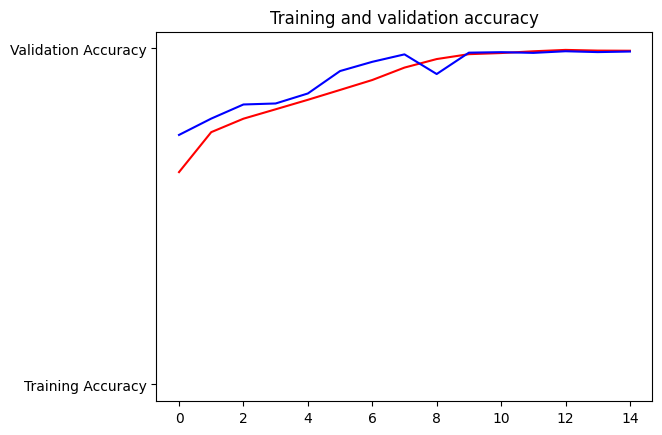

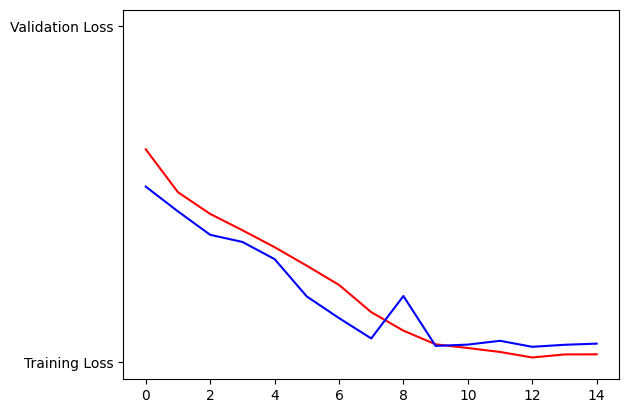

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

In [32]:
# Here's a codeblock just for fun. You should be able to upload an image here
# and have it classified without crashing
import numpy as np
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving PHOTO-2024-10-02-11-24-38.jpg to PHOTO-2024-10-02-11-24-38.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
[1.]
PHOTO-2024-10-02-11-24-38.jpg is a dog
